In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


In [5]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [7]:
top_pub_count = data["Publisher"].value_counts().sort_values(ascending=False).head(20)
top_pub_count

Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Midway Games                               198
Eidos Interactive                          198
505 Games                                  192
Name: Publisher, dtype: int64

In [8]:
bottom_pub_count = data["Publisher"].value_counts().sort_values(ascending=False).tail(20)
bottom_pub_count

Kids Station                  1
Interworks Unlimited, Inc.    1
American Softworks            1
Ultravision                   1
989 Sports                    1
Xing Entertainment            1
Wizard Video Games            1
Saurus                        1
Piacci                        1
SCS Software                  1
On Demand                     1
Milestone                     1
King Records                  1
CBS Electronics               1
Phantagram                    1
Visco                         1
Intergrow                     1
Plenty                        1
Locus                         1
Quintet                       1
Name: Publisher, dtype: int64

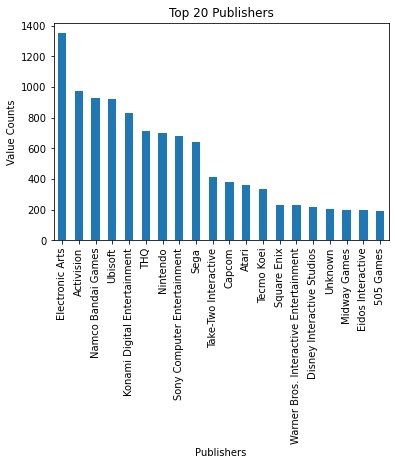

In [9]:
top_pub_count.plot(kind="bar")
plt.title("Top 20 Publishers")
plt.xlabel("Publishers")
plt.ylabel("Value Counts")
plt.show()

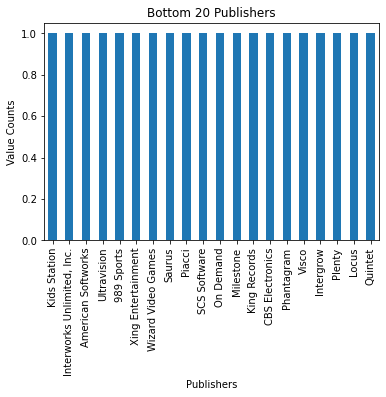

In [10]:
bottom_pub_count.plot(kind="bar")
plt.title("Bottom 20 Publishers")
plt.xlabel("Publishers")
plt.ylabel("Value Counts")
plt.show()

In [11]:
top_pub_sales = data.groupby(["Publisher"])["Global_Sales"].sum().sort_values(ascending=False).head(20)
top_pub_sales_df = pd.DataFrame(top_pub_sales)
top_pub_sales_df.reset_index(inplace=True)
top_pub_sales_df

,Publisher,Global_Sales
0,Nintendo,1786.56
1,Electronic Arts,1110.32
2,Activision,727.46
3,Sony Computer Entertainment,607.50
4,Ubisoft,474.72
5,Take-Two Interactive,399.54
6,THQ,340.77
7,Konami Digital Entertainment,283.64
8,Sega,272.99
9,Namco Bandai Games,254.09


In [12]:
bottom_pub_sales = data.groupby(["Publisher"])["Global_Sales"].sum().sort_values(ascending=False).tail(20)
bottom_pub_sales_df = pd.DataFrame(bottom_pub_sales)
bottom_pub_sales_df.reset_index(inplace=True)
bottom_pub_sales_df

,Publisher,Global_Sales
0,Commseed,0.01
1,Paradox Development,0.01
2,Genterprise,0.01
3,Naxat Soft,0.01
4,Michaelsoft,0.01
5,Rain Games,0.01
6,New World Computing,0.01
7,Ascaron Entertainment,0.01
8,Interchannel-Holon,0.01
9,EON Digital Entertainment,0.01


In [13]:
top_sold_game = data[['Name','Global_Sales']].sort_values("Global_Sales",ascending = False).head(20)
top_sold_game

,Name,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37
5,Tetris,30.26
6,New Super Mario Bros.,30.01
7,Wii Play,29.02
8,New Super Mario Bros. Wii,28.62
9,Duck Hunt,28.31


c:\users\ikechukwu\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


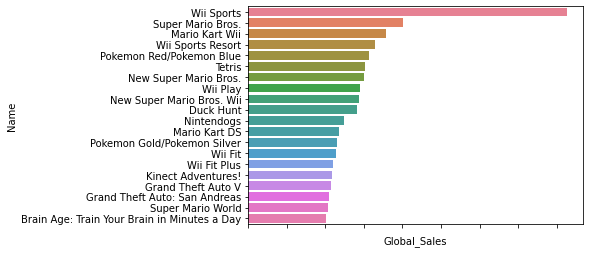

In [26]:
top_sold_game_graph = sns.barplot(x="Global_Sales",y="Name",data=top_sold_game, palette="husl")
top_sold_game_graph.set_xticklabels(top_sold_game_graph.get_xticklabels(),rotation=90)
plt.show()

In [33]:
top_selling_genre = data.groupby(["Genre"])["Global_Sales"].sum().sort_values(ascending=False).head(20)
top_selling_genre_df = pd.DataFrame(top_selling_genre)
top_selling_genre_df.reset_index(inplace=True)
top_selling_genre_df

,Genre,Global_Sales
0,Action,1751.18
1,Sports,1330.93
2,Shooter,1037.37
3,Role-Playing,927.37
4,Platform,831.37
5,Misc,809.96
6,Racing,732.04
7,Fighting,448.91
8,Simulation,392.20
9,Puzzle,244.95


	 Top 20 Sellng Genres


<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

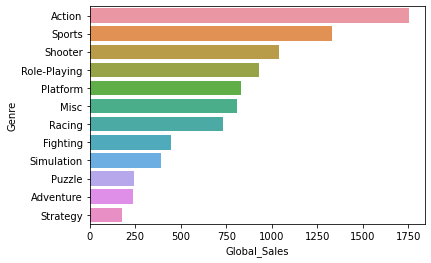

In [40]:
print("\t","Top 20 Sellng Genres")
sns.barplot(x="Global_Sales",y="Genre",data=top_selling_genre_df)

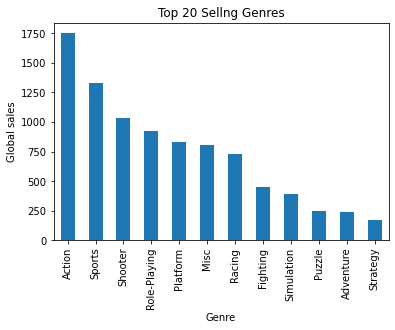

In [16]:
top_selling_genre.plot(kind="bar")
plt.title("Top 20 Sellng Genres")
plt.xlabel("Genre")
plt.ylabel("Global sales")
plt.show()

In [17]:
year_genre_pub_data = data.groupby(["Year","Genre","Publisher"])["Global_Sales"].sum().sort_values(ascending=False).head(20)
year_genre_pub_data

Year    Genre         Publisher           
2006.0  Sports        Nintendo                84.62
2009.0  Sports        Nintendo                56.67
1985.0  Platform      Nintendo                43.17
2006.0  Misc          Nintendo                42.35
2013.0  Action        Take-Two Interactive    37.78
1989.0  Puzzle        Nintendo                37.54
2005.0  Simulation    Nintendo                37.46
2010.0  Sports        Electronic Arts         36.31
2008.0  Racing        Nintendo                35.82
2009.0  Sports        Electronic Arts         34.97
2006.0  Platform      Nintendo                34.94
2014.0  Shooter       Activision              34.59
1996.0  Role-Playing  Nintendo                33.51
2011.0  Shooter       Activision              32.58
2005.0  Sports        Electronic Arts         32.33
2010.0  Shooter       Activision              32.09
2009.0  Shooter       Activision              31.65
2014.0  Sports        Electronic Arts         30.93
2008.0  Sports       

In [57]:
genre_pub_sales_data= pd.pivot_table(data, index=["Publisher"], aggfunc={"Publisher":np.size,"Global_Sales":np.sum,}).sort_values("Global_Sales",ascending=False).head(20)
genre_pub_sales_data_df = pd.DataFrame(genre_pub_sales_data)
genre_pub_sales_data_df=genre_pub_sales_data_df.rename(columns={"Publisher":"Publishers"})
genre_pub_sales_data_df.reset_index(inplace=True)
genre_pub_sales_data_df

,Publisher,Global_Sales,Publishers
0,Nintendo,1786.56,703
1,Electronic Arts,1110.32,1351
2,Activision,727.46,975
3,Sony Computer Entertainment,607.50,683
4,Ubisoft,474.72,921
5,Take-Two Interactive,399.54,413
6,THQ,340.77,715
7,Konami Digital Entertainment,283.64,832
8,Sega,272.99,639
9,Namco Bandai Games,254.09,932


<AxesSubplot:xlabel='Global_Sales', ylabel='Publisher'>

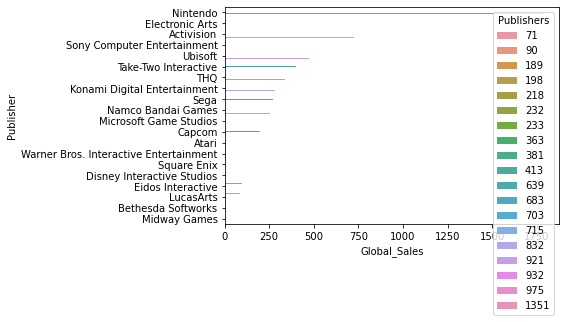

In [61]:
sns.barplot(x="Global_Sales",y="Publisher",data=genre_pub_sales_data_df,hue="Publishers")

In [19]:
slam = pd.pivot_table(data, index=["Year","Publisher"], aggfunc={"Global_Sales":np.sum}).sort_values("Global_Sales",ascending=False).head(20)
slam.sort_values("Year")

Global_Sales
Year   Publisher                    
1989.0 Nintendo                63.88
1996.0 Nintendo                73.70
1999.0 Nintendo                65.33
2002.0 Electronic Arts         73.01
2003.0 Electronic Arts         69.83
2004.0 Electronic Arts         67.33
2005.0 Nintendo               127.47
       Electronic Arts         67.01
2006.0 Nintendo               205.61
2007.0 Electronic Arts         71.33
       Nintendo               104.18
       Activision              63.57
2008.0 Electronic Arts         84.12
       Activision              67.41
       Nintendo                91.22
2009.0 Electronic Arts         86.20
       Nintendo               128.89
       Activision              78.06
2010.0 Electronic Arts         81.38
2011.0 Electronic Arts         72.25

In [20]:
slam.pivot_table(index="Year",columns="Publisher",values="Global_Sales",aggfunc="sum",dropna=True)

Publisher,Activision,Electronic Arts,Nintendo
Year,,,
1989.0,NaN,NaN,63.88
1996.0,NaN,NaN,73.70
1999.0,NaN,NaN,65.33
2002.0,NaN,73.01,NaN
2003.0,NaN,69.83,NaN
2004.0,NaN,67.33,NaN
2005.0,NaN,67.01,127.47
2006.0,NaN,NaN,205.61
2007.0,63.57,71.33,104.18


In [21]:
data.Year.max()

2020.0

In [22]:
tips = sns.load_dataset("tips")

URLError: <urlopen error [Errno 11001] getaddrinfo failed>